In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [104]:
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [105]:
job = data.drop_duplicates(['job'])['job'].values
job = dict(zip(job, range(0, len(job))))

marital=data.drop_duplicates(['marital'])['marital'].values
marital = dict(zip(marital, range(0, len(marital))))

education = data.drop_duplicates(['education'])['education'].values
education = dict(zip(education, range(0, len(education))))

housing = data.drop_duplicates(['housing'])['housing'].values
housing = dict(zip(housing, range(0, len(housing))))

default = data.drop_duplicates(['default'])['default'].values
default = dict(zip(default, range(0, len(default))))

loan = data.drop_duplicates(['loan'])['loan'].values
loan = dict(zip(loan, range(0, len(loan))))

contact = data.drop_duplicates(['contact'])['contact'].values
contact = dict(zip(contact, range(0, len(contact))))

month = data.drop_duplicates(['month'])['month'].values
month = dict(zip(month, range(0, len(month))))

day_of_week = data.drop_duplicates(['day_of_week'])['day_of_week'].values
day_of_week = dict(zip(day_of_week, range(0, len(day_of_week))))

poutcome = data.drop_duplicates(['poutcome'])['poutcome'].values
poutcome = dict(zip(poutcome, range(0, len(poutcome))))

In [106]:
print(job, '\n', marital, '\n', education, '\n', housing, '\n', default, '\n', loan, '\n', contact, '\n', month, '\n', day_of_week, '\n', poutcome, '\n', )

{'blue-collar': 0, 'technician': 1, 'management': 2, 'services': 3, 'retired': 4, 'admin.': 5, 'housemaid': 6, 'unemployed': 7, 'entrepreneur': 8, 'self-employed': 9, 'unknown': 10, 'student': 11} 
 {'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3} 
 {'basic.4y': 0, 'unknown': 1, 'university.degree': 2, 'high.school': 3, 'basic.9y': 4, 'professional.course': 5, 'basic.6y': 6, 'illiterate': 7} 
 {'yes': 0, 'no': 1, 'unknown': 2} 
 {'unknown': 0, 'no': 1, 'yes': 2} 
 {'no': 0, 'yes': 1, 'unknown': 2} 
 {'cellular': 0, 'telephone': 1} 
 {'aug': 0, 'nov': 1, 'jun': 2, 'apr': 3, 'jul': 4, 'may': 5, 'oct': 6, 'mar': 7, 'sep': 8, 'dec': 9} 
 {'thu': 0, 'fri': 1, 'tue': 2, 'mon': 3, 'wed': 4} 
 {'nonexistent': 0, 'success': 1, 'failure': 2} 



In [107]:
data.replace(job, inplace = True)
data.replace(marital, inplace = True)
data.replace(education, inplace = True)
data.replace(housing, inplace = True)
data.replace(default, inplace = True)
data.replace(loan, inplace = True)
data.replace(contact, inplace = True)
data.replace(month, inplace = True)
data.replace(day_of_week, inplace = True)
data.replace(poutcome, inplace = True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,0,0,0,10,0,1,0,0,0,...,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,1,0,10,1,1,1,0,1,1,...,1,999,0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,2,1,2,1,0,1,0,2,0,...,3,6,2,1,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,3,0,3,1,1,1,0,3,1,...,2,999,0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,4,0,0,1,0,1,0,0,1,...,1,3,1,1,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,4,0,3,10,1,0,1,2,0,...,1,999,0,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,6,0,0,10,1,1,1,5,0,...,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,5,1,2,10,0,0,1,5,4,...,3,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,1,0,5,1,1,0,1,6,2,...,2,999,0,0,-3.4,92.431,-26.9,0.742,5017.5,0


In [108]:
X = data.drop(columns=['y'])
y = data['y']

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [110]:
log_regression = LogisticRegression()

In [111]:
log_regression.fit(X_train,y_train)

/home/sairon/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
y_pred = log_regression.predict(X_test)

In [113]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10606,   325],
       [  857,   569]])

<Axes: >

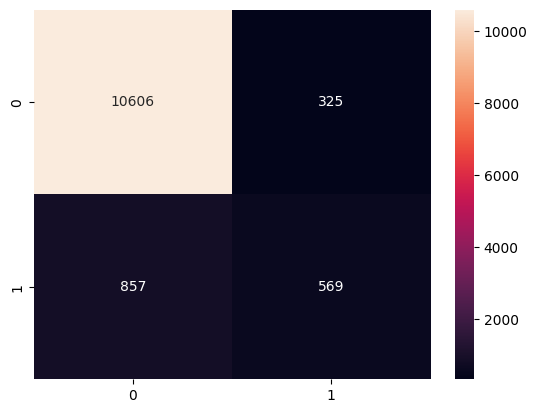

In [114]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [115]:
print(" Accuracy:",metrics.accuracy_score(y_test, y_pred))

 Accuracy: 0.9043457149793639


In [116]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.6364653243847874


In [117]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.39901823281907434


In [118]:
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

F1: [0.947218   0.49051724]


In [119]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

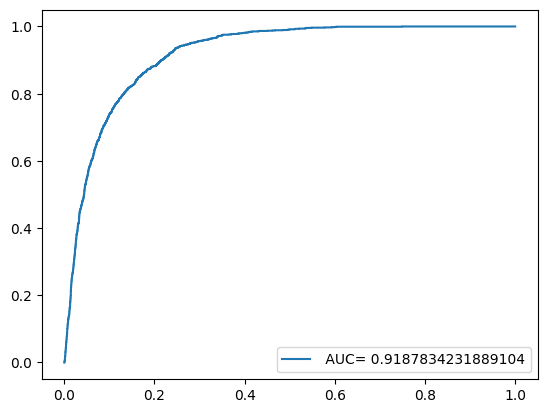

In [120]:
plt.plot(fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()